Import Libraries

In [99]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
# Load Data Set
file_path1= r"C:\Users\Lenovo\Desktop\Internship\atliQ\dim_date.csv"
file_path2= r"C:\Users\Lenovo\Desktop\Internship\atliQ\dim_hotels.csv"
file_path3= r"C:\Users\Lenovo\Desktop\Internship\atliQ\dim_rooms.csv"
file_path4= r"C:\Users\Lenovo\Desktop\Internship\atliQ\fact_aggregated_bookings.csv"
file_path5= r"C:\Users\Lenovo\Desktop\Internship\atliQ\fact_bookings.csv"

dim_date=pd.read_csv(file_path1)
dim_hotels=pd.read_csv(file_path2)
dim_rooms=pd.read_csv(file_path3)
fact_aggregated_bookings=pd.read_csv(file_path4)
fact_booking=pd.read_csv(file_path5)


In [101]:
# Data Cleaning And Preprocessing
dim_date.head()
dim_date.info()
dim_date.describe()
dim_date=dim_date[dim_date['week no']!='W 32']

dim_hotels.head()
dim_hotels.info()
dim_hotels.describe()

dim_rooms.head()
dim_rooms.info()
dim_rooms.describe()

fact_aggregated_bookings.head()
fact_aggregated_bookings.info()
fact_aggregated_bookings.describe()

fact_booking.head()
fact_booking.info()
fact_booking.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      92 non-null     object
 1   mmm yy    92 non-null     object
 2   week no   92 non-null     object
 3   day_type  92 non-null     object
dtypes: object(4)
memory usage: 3.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   property_id    25 non-null     int64 
 1   property_name  25 non-null     object
 2   category       25 non-null     object
 3   city           25 non-null     object
dtypes: int64(1), object(3)
memory usage: 932.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   room_id     4 non-null      ob

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134590.000000,56683.000000,134590.000000,134590.000000
mean,18061.113493,2.036808,3.619004,14916.013188,12696.123256
std,1093.055847,1.031766,1.235009,6452.868072,6928.108124
min,16558.000000,1.000000,1.000000,6500.000000,2600.000000
25%,17558.000000,1.000000,3.000000,9900.000000,7600.000000
50%,17564.000000,2.000000,4.000000,13500.000000,11700.000000
75%,18563.000000,2.000000,5.000000,18000.000000,15300.000000
max,19563.000000,6.000000,5.000000,45220.000000,45220.000000


In [102]:
# Checking number of rows and colums
dim_date.shape

(91, 4)

In [103]:
# Checking number of rows and colums
dim_hotels.shape

(25, 4)

In [104]:
# Checking number of rows and colums
dim_rooms.shape

(4, 2)

In [105]:
# Checking number of rows and colums
fact_aggregated_bookings.shape

(9200, 5)

In [106]:
# Checking number of rows and colums
fact_booking.shape

(134590, 12)

In [107]:
# Handling missing values
dim_date.isnull().sum()  
dim_hotels.isnull().sum()  
dim_rooms.isnull().sum()  
fact_aggregated_bookings.isnull().sum()
fact_booking.isnull().sum()



booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        77907
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

In [108]:
# Drop or fill missing values
fact_booking.dropna(inplace=True)
fact_booking.isnull().sum()


booking_id           0
property_id          0
booking_date         0
check_in_date        0
checkout_date        0
no_guests            0
room_category        0
booking_platform     0
ratings_given        0
booking_status       0
revenue_generated    0
revenue_realized     0
dtype: int64

In [109]:
# Checking Data Types
dim_date.dtypes
dim_hotels.dtypes 
dim_rooms.dtypes
fact_aggregated_bookings.dtypes
fact_booking.dtypes

booking_id            object
property_id            int64
booking_date          object
check_in_date         object
checkout_date         object
no_guests              int64
room_category         object
booking_platform      object
ratings_given        float64
booking_status        object
revenue_generated      int64
revenue_realized       int64
dtype: object

In [110]:
# Change Data Types
dim_date['date']=pd.to_datetime(dim_date['date'])
fact_aggregated_bookings['check_in_date']=pd.to_datetime(fact_aggregated_bookings['check_in_date'])
fact_booking['booking_date']=pd.to_datetime(fact_booking['booking_date'])
fact_booking['check_in_date']=pd.to_datetime(fact_booking['check_in_date'])
fact_booking['checkout_date']=pd.to_datetime(fact_booking['checkout_date'])



C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13196\1244821486.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dim_date['date']=pd.to_datetime(dim_date['date'])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13196\1244821486.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  fact_aggregated_bookings['check_in_date']=pd.to_datetime(fact_aggregated_bookings['check_in_date'])


Revenue Analysis

In [111]:
# combining two dataset to get desired output
revenue_df=pd.merge(dim_hotels,fact_booking)
revenue_df.head()

,property_id,property_name,category,city,booking_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,16558,Atliq Grands,Luxury,Delhi,May012216558RT11,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010
1,16558,Atliq Grands,Luxury,Delhi,May012216558RT13,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100
2,16558,Atliq Grands,Luxury,Delhi,May012216558RT15,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,10920,10920
3,16558,Atliq Grands,Luxury,Delhi,May012216558RT16,2022-05-01,2022-05-01,2022-05-03,2,RT1,others,4.0,Checked Out,9100,9100
4,16558,Atliq Grands,Luxury,Delhi,May012216558RT110,2022-04-28,2022-05-01,2022-05-02,1,RT1,others,4.0,Checked Out,9100,9100


In [112]:
# Hotelwise Revenue
hotel_revenue=revenue_df.groupby(['property_name','city']).agg({'revenue_realized':'sum'}).reset_index().rename(columns={'revenue_realized':'Revenue in Million'})
hotel_revenue['Revenue in Million']=hotel_revenue['Revenue in Million']/1000000
hotel_revenue['Revenue in Million']=hotel_revenue['Revenue in Million'].round(2)
hotel_revenue

,property_name,city,Revenue in Million
0,Atliq Bay,Bangalore,40.71
1,Atliq Bay,Delhi,27.94
2,Atliq Bay,Hyderabad,34.22
3,Atliq Bay,Mumbai,25.28
4,Atliq Blu,Bangalore,35.52
5,Atliq Blu,Delhi,28.82
6,Atliq Blu,Hyderabad,27.23
7,Atliq Blu,Mumbai,36.60
8,Atliq City,Bangalore,40.73
9,Atliq City,Delhi,28.04


In [113]:
revenue_pivot=hotel_revenue.pivot(index='city',columns='property_name',values='Revenue in Million')
revenue_pivot

property_name,Atliq Bay,Atliq Blu,Atliq City,Atliq Exotica,Atliq Grands,Atliq Palace,Atliq Seasons
city,,,,,,,
Bangalore,40.71,35.52,40.73,29.30,27.15,33.82,NaN
Delhi,27.94,28.82,28.04,NaN,18.11,43.89,NaN
Hyderabad,34.22,27.23,30.55,23.89,23.40,22.05,NaN
Mumbai,25.28,36.60,43.95,104.66,37.17,50.22,32.88


Text(0.5, 1.0, 'City & Hotel Wise Revenue')

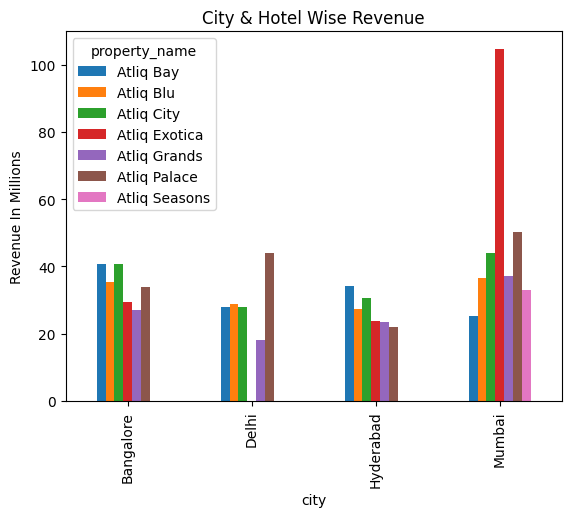

In [114]:
revenue_pivot.plot(kind='bar')
plt.ylabel('Revenue In Millions')
plt.title('City & Hotel Wise Revenue')

In [123]:
# City Wise Revenue 
city_revenue = revenue_df.groupby('city').agg({'revenue_realized': 'sum'}).reset_index()
city_revenue.rename(columns={'revenue_realized': 'Revenue in Million'}, inplace=True)
city_revenue['Revenue in Million']=city_revenue['Revenue in Million']/1000000
city_revenue['Revenue in Million']=city_revenue['Revenue in Million'].round(2)
city_revenue.sort_values(by='Revenue in Million',ascending=False)



,city,Revenue in Million
3,Mumbai,330.76
0,Bangalore,207.22
2,Hyderabad,161.33
1,Delhi,146.80


TypeError: 'str' object is not callable

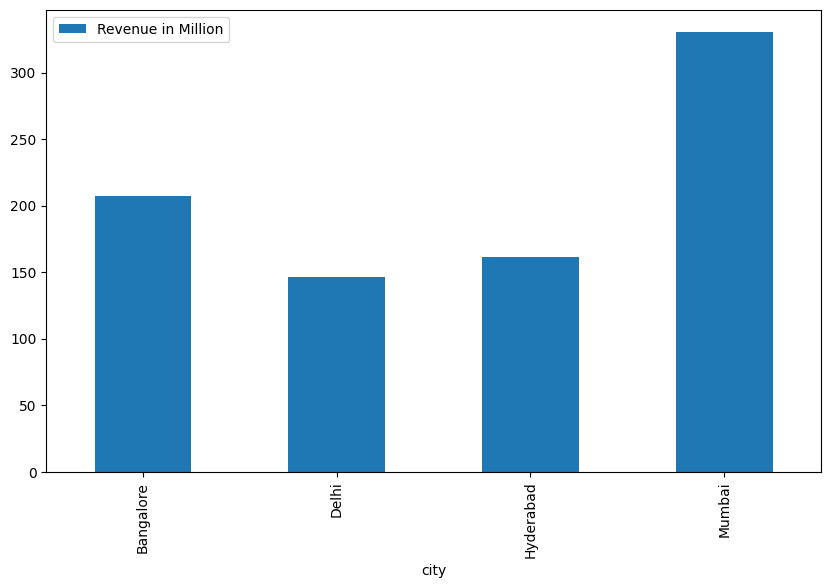

In [140]:

city_revenue.plot(kind='bar', x='city', y='Revenue in Million', figsize=(10, 6))

# Add title and labels
plt.title('City Wise Revenue')
plt.xlabel('City')
plt.ylabel('Revenue in Million')
plt.show()

In [141]:
revenue_tr=pd.merge(dim_date,revenue_df,how='left',left_on='date',right_on='check_in_date')
revenue_trend=revenue_tr.groupby(['week no','property_name']).agg({'revenue_realized':'sum'}).rename(columns={'revenue_realized':'Revenue in Millions'})
revenue_trend['Revenue in Millions']=revenue_trend['Revenue in Millions']/1000000
revenue_trend['Revenue in Millions']=revenue_trend['Revenue in Millions'].round(2)
revenue_trend.reset_index(inplace=True)
revenue_trend

,week no,property_name,Revenue in Millions
0,W 19,Atliq Bay,9.74
1,W 19,Atliq Blu,10.86
2,W 19,Atliq City,12.06
3,W 19,Atliq Exotica,12.24
4,W 19,Atliq Grands,8.44
...,...,...,...
86,W 31,Atliq City,9.67
87,W 31,Atliq Exotica,10.46
88,W 31,Atliq Grands,6.87
89,W 31,Atliq Palace,10.36


TypeError: 'str' object is not callable

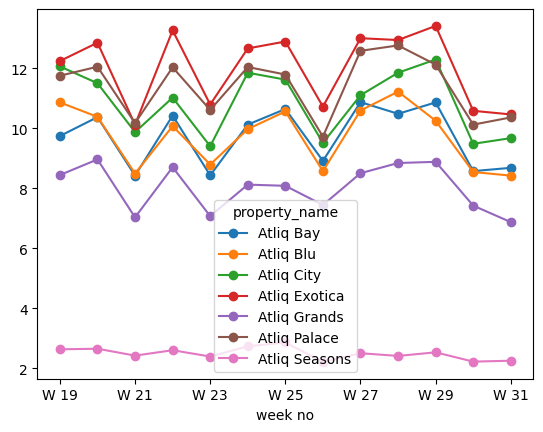

In [144]:
# Weekly Hotelwise Revenue Trend
pivot_data=revenue_trend.pivot(index='week no',columns='property_name',values='Revenue in Millions')
pivot_data.plot(kind='line',marker='o')
plt.ylabel('Revenue in Millions')
plt.title('Weekly Revenue Trend')

In [145]:
# Week over Week Revenue Trend
atliq_revenue_trend=revenue_tr.groupby(['week no']).agg({'revenue_realized':'sum'}).rename(columns={'revenue_realized':'Revenue in Millions'})
atliq_revenue_trend['Revenue in Millions']=atliq_revenue_trend['Revenue in Millions']/1000000
atliq_revenue_trend['Revenue in Millions']=atliq_revenue_trend['Revenue in Millions'].round(2)
atliq_revenue_trend['Prev week Revenue']=atliq_revenue_trend['Revenue in Millions'].shift(1)
atliq_revenue_trend['Change Percentage']=((atliq_revenue_trend['Revenue in Millions']/atliq_revenue_trend['Prev week Revenue'])-1)*100
atliq_revenue_trend

,Revenue in Millions,Prev week Revenue,Change Percentage
week no,,,
W 19,67.71,NaN,NaN
W 20,68.78,67.71,1.580269
W 21,56.51,68.78,-17.839488
W 22,68.09,56.51,20.491948
W 23,57.48,68.09,-15.582318
W 24,67.48,57.48,17.397356
W 25,68.45,67.48,1.437463
W 26,57.08,68.45,-16.610665
W 27,69.14,57.08,21.128241


TypeError: 'str' object is not callable

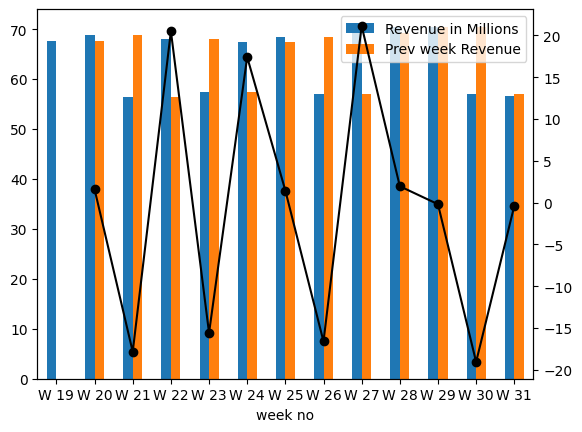

In [147]:
atliq_revenue_trend[['Revenue in Millions','Prev week Revenue']].plot(kind='bar')
atliq_revenue_trend['Change Percentage'].plot(secondary_y=True,color='black',marker='o')
plt.ylabel('Percentage Change')
plt.title('Week over week revenue Change')

Booking Analysis

In [159]:
# Hotelwise Bookings
hotel_bookings=revenue_df.groupby(['property_name','city']).agg({'booking_id':'nunique'}).rename(columns={'booking_id':'Total bookings'})
hotel_bookings.reset_index(inplace=True)
hotel_bookings

,property_name,city,Total bookings
0,Atliq Bay,Bangalore,2451
1,Atliq Bay,Delhi,2031
2,Atliq Bay,Hyderabad,3059
3,Atliq Bay,Mumbai,1419
4,Atliq Blu,Bangalore,2394
5,Atliq Blu,Delhi,1862
6,Atliq Blu,Hyderabad,2694
7,Atliq Blu,Mumbai,2195
8,Atliq City,Bangalore,2493
9,Atliq City,Delhi,2046


TypeError: 'str' object is not callable

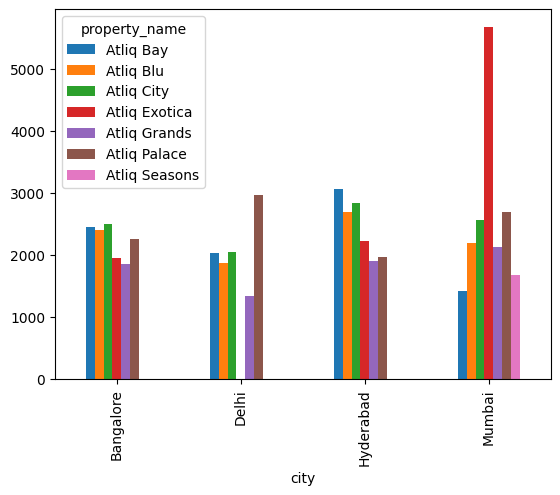

In [160]:
booking_pivot=hotel_bookings.pivot(index='city',columns='property_name',values='Total bookings')
booking_pivot.plot(kind='bar')
plt.ylabel('Total Bookings')
plt.title('Hotel & City wise Bookings')

In [164]:
# booking platform wise
platform_df=revenue_df.groupby(['booking_platform']).agg({'booking_id':'nunique'}).rename(columns={'booking_id':'Total Bookings'})
platform_df.sort_values(by='Total Bookings',ascending=False)

,Total Bookings
booking_platform,
others,23135
makeyourtrip,11311
logtrip,6255
direct online,5615
tripster,4064
journey,3466
direct offline,2837


In [165]:
platform_df=platform_df.sort_values(by='Total Bookings')

TypeError: 'str' object is not callable

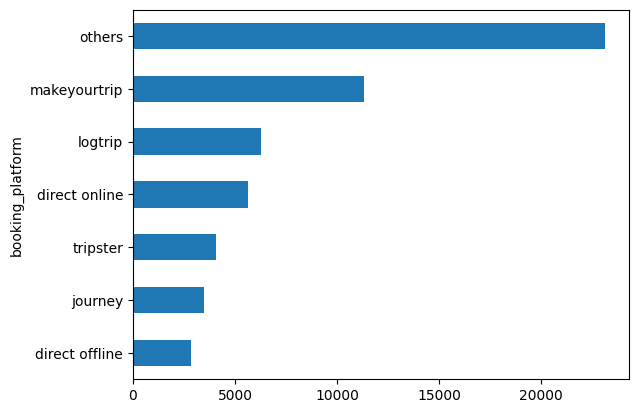

In [166]:
ax=platform_df.plot(kind='barh',legend=False)
plt.xlabel('Total Bookings')
plt.title('Platformwise Hotel Bookings')
for index, value in enumerate(platform_df['Total Bookings']):
    ax.text(value, index, str(value))
plt.show()

In [168]:
rooms_df=pd.merge(dim_rooms,fact_booking,how='left',left_on='room_id',right_on='room_category')
rooms_df.head()

,room_id,room_class,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,RT1,Standard,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010
1,RT1,Standard,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100
2,RT1,Standard,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,10920,10920
3,RT1,Standard,May012216558RT16,16558,2022-05-01,2022-05-01,2022-05-03,2,RT1,others,4.0,Checked Out,9100,9100
4,RT1,Standard,May012216558RT110,16558,2022-04-28,2022-05-01,2022-05-02,1,RT1,others,4.0,Checked Out,9100,9100


In [169]:
# Room Categorywise Bookings
room_bookings=rooms_df.groupby(['room_class']).agg({'booking_id':'nunique'})
room_bookings['Percentage']=room_bookings['booking_id']*100/room_bookings['booking_id'].sum()
room_bookings['Percentage']=room_bookings['Percentage'].round(2)
room_bookings

,booking_id,Percentage
room_class,,
Elite,20811,36.71
Premium,12755,22.50
Presidential,6880,12.14
Standard,16237,28.65


array([<Axes: ylabel='Percentage'>], dtype=object)

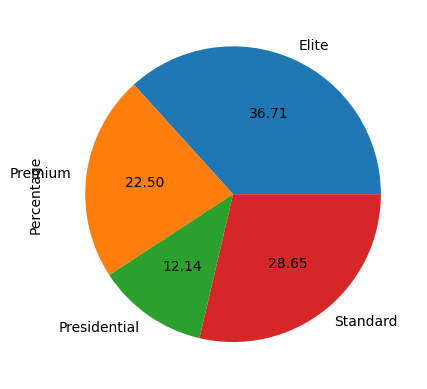

In [170]:
# Room Caegory wise Booking Percentage
room_bookings['Percentage'].plot(kind='pie',subplots=True,autopct='%0.2f')

In [171]:
# Booking Trends weekly
weekly_bookings=revenue_tr.groupby(['week no','property_name']).agg({'booking_id':'nunique'}).rename(columns={'booking_id':'Total Bookings'})
weekly_bookings.reset_index(inplace=True)
weekly_bookings_pivot=weekly_bookings.pivot(index='week no',columns='property_name',values='Total Bookings')
weekly_bookings_pivot

property_name,Atliq Bay,Atliq Blu,Atliq City,Atliq Exotica,Atliq Grands,Atliq Palace,Atliq Seasons
week no,,,,,,,
W 19,693,756,847,780,582,781,134
W 20,722,736,800,802,604,793,133
W 21,587,613,690,641,480,667,125
W 22,728,724,767,809,594,787,129
W 23,591,637,644,670,488,704,124
W 24,717,734,803,815,562,784,138
W 25,743,753,816,789,557,780,144
W 26,609,620,662,668,500,635,113
W 27,762,756,782,826,589,816,131


TypeError: 'str' object is not callable

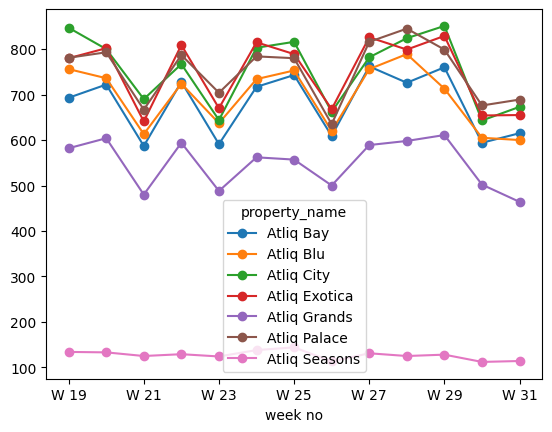

In [172]:
weekly_bookings_pivot.plot(kind='line',marker='o')
plt.ylabel('Total Bookings')
plt.title('Weekly Hotel Bookings')

In [175]:
x=revenue_tr.groupby(['week no','booking_status']).agg({'booking_id':'nunique'})
x.reset_index(inplace=True)
x

,week no,booking_status,booking_id
0,W 19,Checked Out,4573
1,W 20,Checked Out,4590
2,W 21,Checked Out,3803
3,W 22,Checked Out,4538
4,W 23,Checked Out,3858
5,W 24,Checked Out,4553
6,W 25,Checked Out,4582
7,W 26,Checked Out,3807
8,W 27,Checked Out,4662
9,W 28,Checked Out,4706


In [176]:
y=revenue_tr.groupby(['week no']).agg({'booking_id':'nunique'}).rename(columns={'booking_id':'Total Bookings'})
y.reset_index(inplace=True)
y

,week no,Total Bookings
0,W 19,4573
1,W 20,4590
2,W 21,3803
3,W 22,4538
4,W 23,3858
5,W 24,4553
6,W 25,4582
7,W 26,3807
8,W 27,4662
9,W 28,4706


Occupancy Analysis

In [180]:
oc=pd.merge(dim_hotels,fact_aggregated_bookings,how='left',on='property_id')
occ_df=pd.merge(dim_date,oc,how='left',left_on='date',right_on='check_in_date')
occ_df.head()

,date,mmm yy,week no,day_type,property_id,property_name,category,city,check_in_date,room_category,successful_bookings,capacity
0,2022-05-01,22-May,W 19,weekend,16558,Atliq Grands,Luxury,Delhi,2022-05-01,RT1,18,19
1,2022-05-01,22-May,W 19,weekend,16558,Atliq Grands,Luxury,Delhi,2022-05-01,RT2,21,22
2,2022-05-01,22-May,W 19,weekend,16558,Atliq Grands,Luxury,Delhi,2022-05-01,RT3,8,8
3,2022-05-01,22-May,W 19,weekend,16558,Atliq Grands,Luxury,Delhi,2022-05-01,RT4,3,3
4,2022-05-01,22-May,W 19,weekend,16559,Atliq Exotica,Luxury,Mumbai,2022-05-01,RT1,25,30


In [181]:
# Hotelwise Occupancy
hotel_occ=occ_df.groupby(['city','property_name']).agg({'successful_bookings':'sum','capacity':'sum'})
hotel_occ['Occupancy']=hotel_occ['successful_bookings']*100/hotel_occ['capacity']
hotel_occ.reset_index(inplace=True)
hotel_occ

,city,property_name,successful_bookings,capacity,Occupancy
0,Bangalore,Atliq Bay,5736,8736,65.659341
1,Bangalore,Atliq Blu,5669,10647,53.245046
2,Bangalore,Atliq City,5904,9009,65.534466
3,Bangalore,Atliq Exotica,4645,8645,53.730480
4,Bangalore,Atliq Grands,4316,9737,44.325768
5,Bangalore,Atliq Palace,5347,10010,53.416583
6,Delhi,Atliq Bay,4762,8918,53.397623
7,Delhi,Atliq Blu,4362,6643,65.663104
8,Delhi,Atliq City,4635,8645,53.614806
9,Delhi,Atliq Grands,3114,4732,65.807270


TypeError: 'str' object is not callable

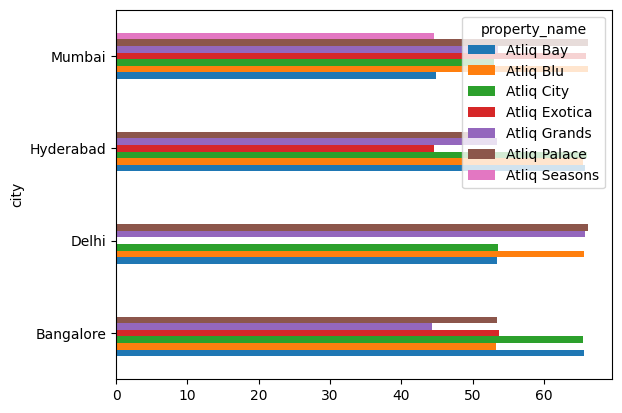

In [182]:
hotel_occ_pivot=hotel_occ.pivot(index='city',columns='property_name',values='Occupancy')
hotel_occ_pivot.plot(kind='barh')
plt.xlabel('Occupancy Percentage')
plt.title('City & Hotel wise Occupancy')

In [183]:
# Room Class wise Occupancy
room_occ=pd.merge(dim_rooms,occ_df,how='left',left_on='room_id',right_on='room_category')
room_occ_df=room_occ.groupby(['room_class']).agg({'successful_bookings':'sum','capacity':'sum'})
room_occ_df['Occupancy']=room_occ_df['successful_bookings']*100/room_occ_df['capacity']
room_occ_df['Occupancy']=room_occ_df['Occupancy'].round(2)
room_occ_df

,successful_bookings,capacity,Occupancy
room_class,,,
Elite,48916,84994,57.55
Premium,30186,52507,57.49
Presidential,15876,26845,59.14
Standard,37961,65702,57.78


In [184]:
room_df=room_occ_df[['Occupancy']]
room_df=room_df.sort_values(by='Occupancy')
room_df

,Occupancy
room_class,
Premium,57.49
Elite,57.55
Standard,57.78
Presidential,59.14


TypeError: 'str' object is not callable

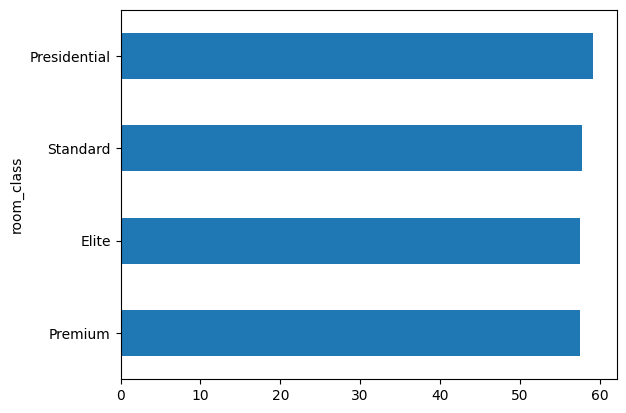

In [185]:
ax=room_df.plot(kind='barh',legend=False)
plt.xlabel('Occupancy Percentage')
plt.title('Room Class Wise Occupancy')
for index, value in enumerate(room_df['Occupancy']):
    ax.text(value, index, str(value))
plt.show()

In [186]:
# Daywise Occupancy
occ_df['Day Name']=occ_df['date'].dt.day_name()
occ_df['Day No']=occ_df['date'].dt.dayofweek
day_occ=occ_df.groupby(['Day Name','Day No','property_name']).agg({'successful_bookings':'sum','capacity':'sum'})
day_occ['Occupancy']=day_occ['successful_bookings']*100/day_occ['capacity']
day_occx=day_occ[['Occupancy']]
z=day_occx.reset_index()
z.sort_values(by='Day No')

,Day Name,Day No,property_name,Occupancy
13,Monday,0,Atliq Seasons,38.620143
7,Monday,0,Atliq Bay,51.816776
8,Monday,0,Atliq Blu,55.618204
9,Monday,0,Atliq City,52.690502
10,Monday,0,Atliq Exotica,51.063094
11,Monday,0,Atliq Grands,46.590909
12,Monday,0,Atliq Palace,53.324946
35,Tuesday,1,Atliq Bay,52.010050
36,Tuesday,1,Atliq Blu,54.409988
37,Tuesday,1,Atliq City,52.130733


TypeError: 'str' object is not callable

<Figure size 1000x800 with 0 Axes>

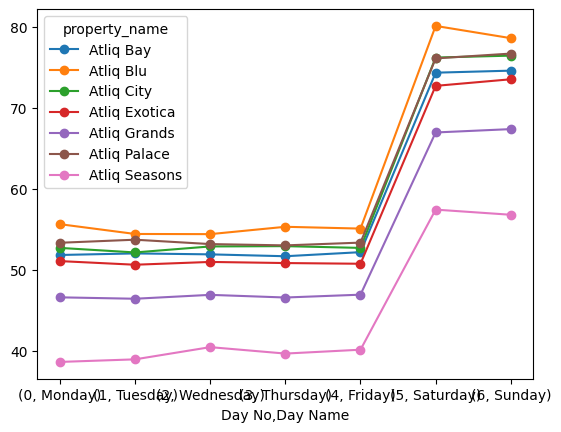

In [189]:
plt.figure(figsize=(10, 8))
z_pivot=z.pivot(index=['Day No','Day Name'],columns='property_name',values='Occupancy')
z_pivot.plot(kind='line',marker='o')
plt.ylabel('Occupancy Percentage')
plt.title('Daywise Occupancy')

In [190]:
weekly_occ=occ_df.groupby(['week no','property_name']).agg({'successful_bookings':'sum','capacity':'sum'})
weekly_occx=weekly_occ.reset_index()
weekly_occx['Occupancy']=weekly_occx['successful_bookings']*100/weekly_occx['capacity']
weekly_occx

,week no,property_name,successful_bookings,capacity,Occupancy
0,W 19,Atliq Bay,1745,2786,62.634602
1,W 19,Atliq Blu,1771,2674,66.230366
2,W 19,Atliq City,1897,2982,63.615023
3,W 19,Atliq Exotica,1907,3115,61.219904
4,W 19,Atliq Grands,1411,2464,57.264610
...,...,...,...,...,...
86,W 31,Atliq City,1566,2982,52.515091
87,W 31,Atliq Exotica,1557,3115,49.983949
88,W 31,Atliq Grands,1130,2464,45.860390
89,W 31,Atliq Palace,1593,2996,53.170895


TypeError: 'str' object is not callable

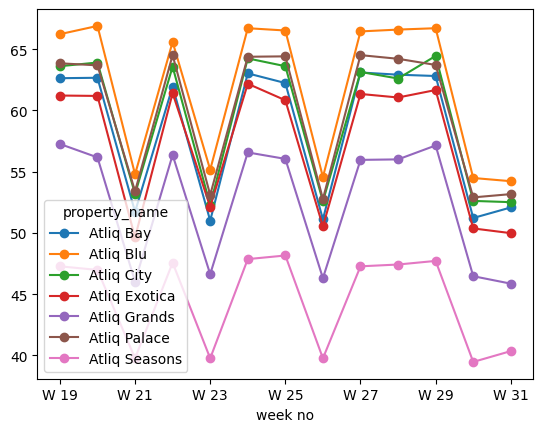

In [191]:
weekly_occx_pivot=weekly_occx.pivot(index='week no',columns='property_name',values='Occupancy')
weekly_occx_pivot.plot(kind='line',marker='o')
plt.ylabel('Occupancy Percentage')
plt.title('Weekly Occupancy Trend')

# ADR (Average Daily Rate) Analysis

In [192]:
adr=revenue_tr.groupby(['property_name']).agg({'booking_id':'nunique','revenue_realized':'sum'})

In [193]:
adr['ADR']=adr['revenue_realized']/adr['booking_id']
adr['ADR']=adr['ADR'].round(0)
adrx=adr[['ADR']]
adry=adrx.sort_values(by='ADR')
adrx

,ADR
property_name,
Atliq Bay,14301.0
Atliq Blu,14023.0
Atliq City,14406.0
Atliq Exotica,16012.0
Atliq Grands,14634.0
Atliq Palace,15180.0
Atliq Seasons,19638.0


TypeError: 'str' object is not callable

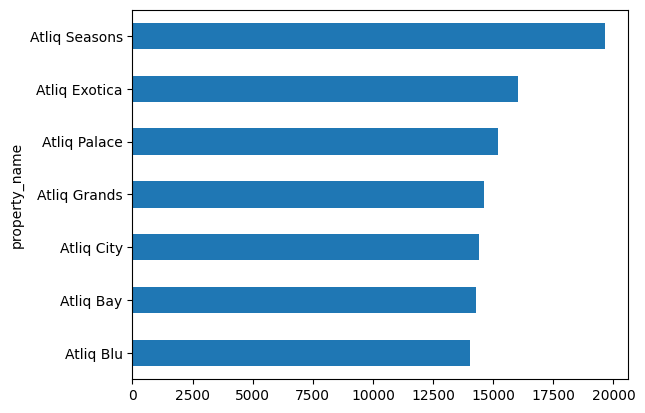

In [194]:
ax=adry.plot(kind='barh',legend=False)
plt.xlabel('ADR')
plt.title('Hotelwise ADR')
for index, value in enumerate(adry['ADR']):
    ax.text(value, index, str(value))
plt.show()

# DBRN, DSRN, DURN Analysis

In [195]:
min_date=dim_date['date'].min()
max_date=dim_date['date'].max()
no_of_days=(max_date-min_date)/np.timedelta64(1,'D')
no_of_days

90.0

In [196]:
#DBRN
DBRN=adr[['booking_id']]/no_of_days
DBRN['booking_id']=DBRN['booking_id'].round(0)
DBRNx=DBRN.sort_values(by='booking_id')


In [198]:
#DSRN
hotel_capacity=pd.merge(dim_hotels,fact_aggregated_bookings,how='left',on='property_id').groupby(['property_name']).agg({'capacity':'sum'})
hotel_capacity['DSRN']=hotel_capacity/no_of_days
hotel_capacity['DSRN']=hotel_capacity['DSRN'].round(0)
hotel_capacity
hotel_capacityx=hotel_capacity.sort_values(by='DSRN')
hotel_capacityy=hotel_capacityx[['DSRN']]
hotel_capacityy

,DSRN
property_name,
Atliq Seasons,99.0
Atliq Grands,360.0
Atliq Blu,390.0
Atliq Bay,407.0
Atliq City,435.0
Atliq Palace,438.0
Atliq Exotica,455.0


In [199]:
# DURN
m=revenue_tr[revenue_tr['booking_status']=='Checked Out']
n=m.groupby(['property_name']).agg({'booking_id':'nunique'})
n['DURN']=n['booking_id']/no_of_days
n['DURN']=n['DURN'].round(0)
n1=n.sort_values(by='DURN')
n2=n1[['DURN']]
n2

,DURN
property_name,
Atliq Seasons,18.0
Atliq Grands,79.0
Atliq Bay,98.0
Atliq Blu,100.0
Atliq Exotica,108.0
Atliq Palace,108.0
Atliq City,109.0


TypeError: 'str' object is not callable

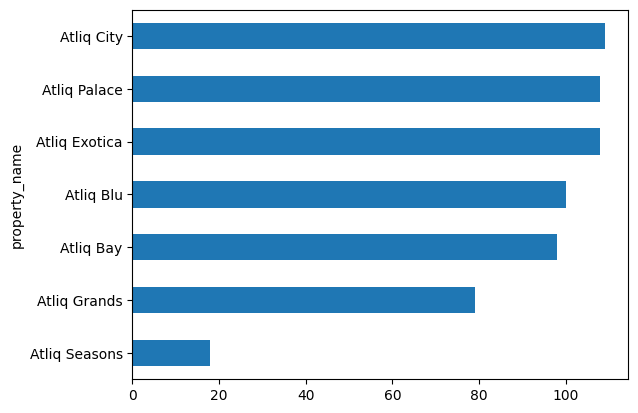

In [200]:
ax=n2.plot(kind='barh',legend=False)
plt.xlabel('DURN')
plt.title('Hotelwise DURN')
for index, value in enumerate(n2['DURN']):
    ax.text(value, index, str(value))
plt.show()